In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anglelaunchtools as tools

In [2]:
def legendArr(thetaArr,cg_cp_Arr):
    a = []
    for i in thetaArr:
        for j in cg_cp_Arr:
            a.append("theta = " + str(i) + " CG-CP = " + str(j))
    return a

In [3]:
def s(V):
    s_x = V[:,0]*tools.DT
    s_y = V[:,1]*tools.DT
    s_x = s_x.cumsum()
    s_y = s_y.cumsum()
    return s_x,s_y

In [4]:
def loopAll(cg_cp = 0.1, theta = 3,loopTime = 5):
    MASS = 6e3
    #declaring empty arrays
    t = np.arange(0,loopTime+tools.DT,tools.DT) 
    alph = np.zeros(len(t))
    bet = np.zeros(len(t))
    T = np.zeros((len(t),2))
    D = np.zeros((len(t),2))
    V = np.zeros((len(t),2))
    alphDot = np.zeros(len(t))
    tau = np.zeros(len(t)) 

    # initializing t = 0 values
    T[0] = tools.thrust(alph[0],np.deg2rad(theta),(1e6 + MASS*1*9.8)/np.cos(np.deg2rad(theta)))
    D[0] = tools.drag(alph[0],bet[0])
    V[0] = np.array([600,0])
    I = tools.moi()
    for i in range(1,len(t)):
        V[i] = tools.updateV(V[i-1],T[i-1],D[i-1])
        bet[i] = tools.betaFromV(alph[i-1],V[i])
        tau[i] = tools.moment(alph[i-1],D[i-1],cg_cp)
        alphDot[i] = tools.updateAlphadot(alphDot[i-1],tau[i],I)
        alph[i] = tools.updateAlpha(alph[i-1],alphDot[i-1])
        T[i] = tools.thrust(alph[i],np.deg2rad(theta),(1e6 + MASS*1*9.8)/np.cos(np.deg2rad(theta)))
        D[i] = tools.drag(alph[i],bet[i])
    return alph,bet,V



In [5]:
thetaArr = np.arange(0,16,1)

In [6]:
cg_cp_Arr = np.array([-0.01,-0.001,0.01,0.1,1])

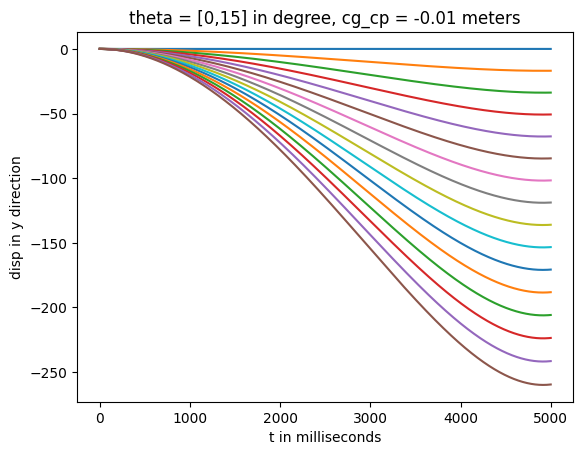

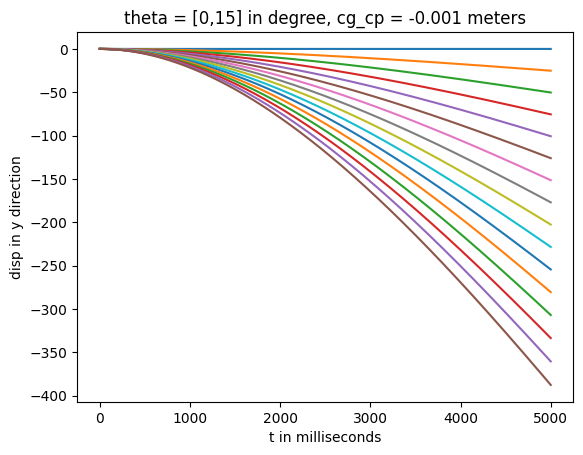

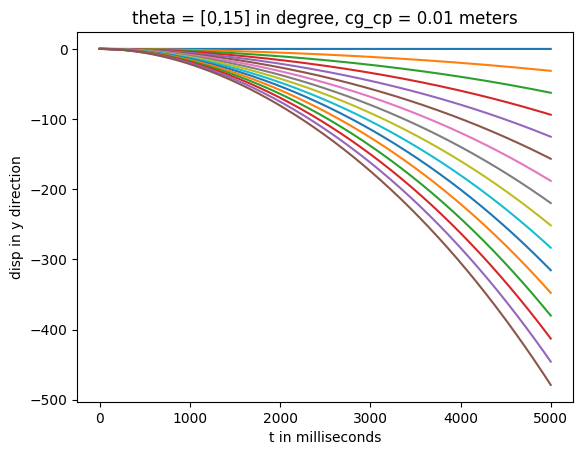

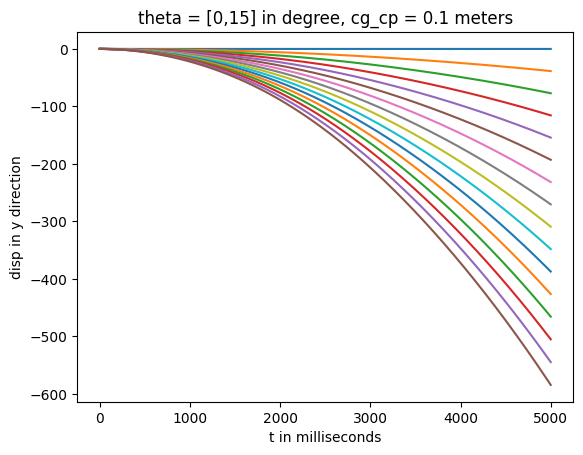

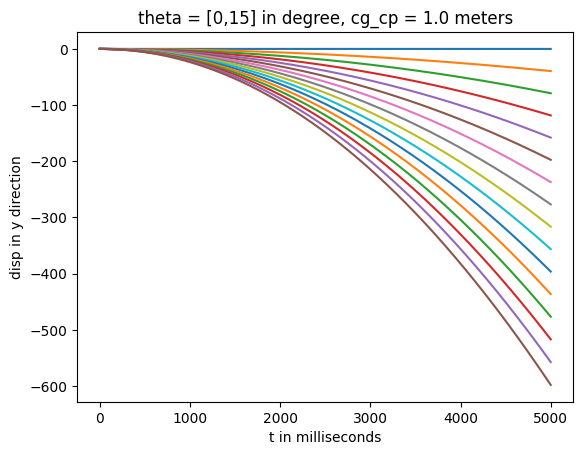

In [7]:
# loop time 5 secs
for j in range(0,len(cg_cp_Arr)):
    for i in range(0,len(thetaArr)):
        alph,bet,V = loopAll(cg_cp_Arr[j],thetaArr[i])
        disp = s(V)
        plt.plot(disp[1])
    legend = legendArr(thetaArr,[cg_cp_Arr[j]])
    # plt.legend(legend,loc = 'center right', bbox_to_anchor=(1.4,0.5))
    plt.title("theta = [0,15] in degree, cg_cp = "+str(cg_cp_Arr[j])+" meters")
    plt.xlabel("t in milliseconds")
    plt.ylabel("disp in y direction")
    plt.show()


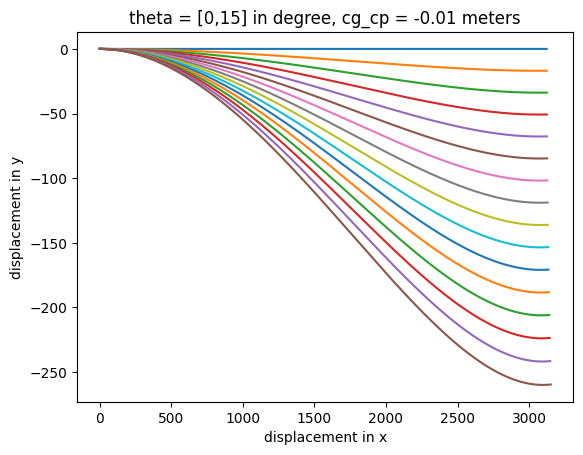

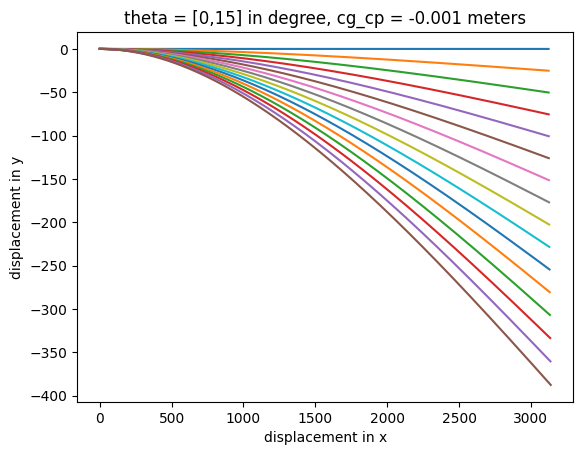

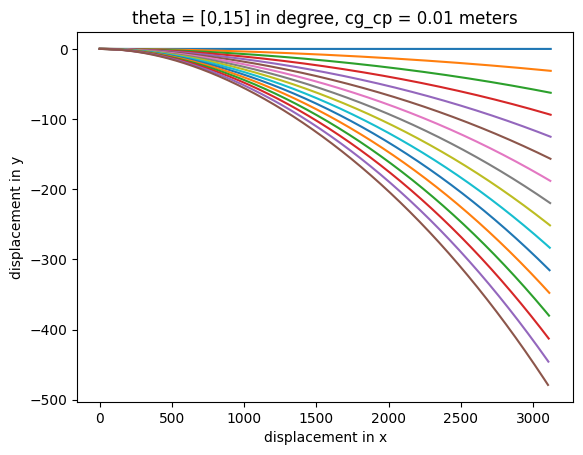

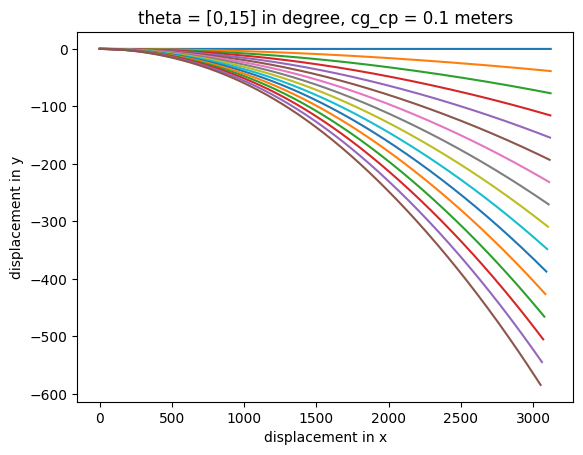

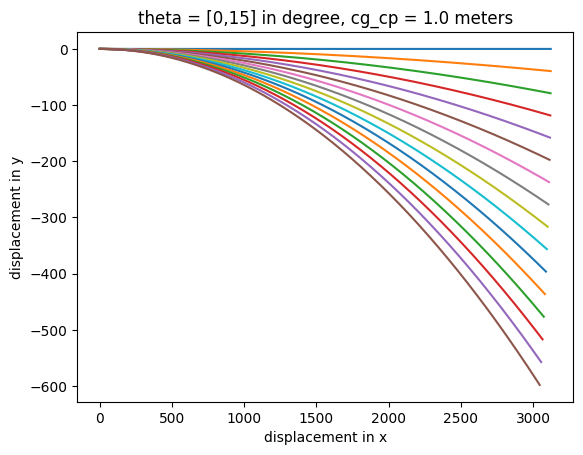

In [8]:
for j in range(0,len(cg_cp_Arr)):
    for i in range(0,len(thetaArr)):
        alph,bet,V = loopAll(cg_cp_Arr[j],thetaArr[i])
        disp = s(V)
        plt.plot(disp[0],disp[1])
    legend = legendArr(thetaArr,[cg_cp_Arr[j]])
    # plt.legend(legend,loc = 'center right', bbox_to_anchor=(1.4,0.5))
    plt.title("theta = [0,15] in degree, cg_cp = "+str(cg_cp_Arr[j])+" meters")
    plt.xlabel("displacement in x")
    plt.ylabel("displacement in y")
    plt.show()

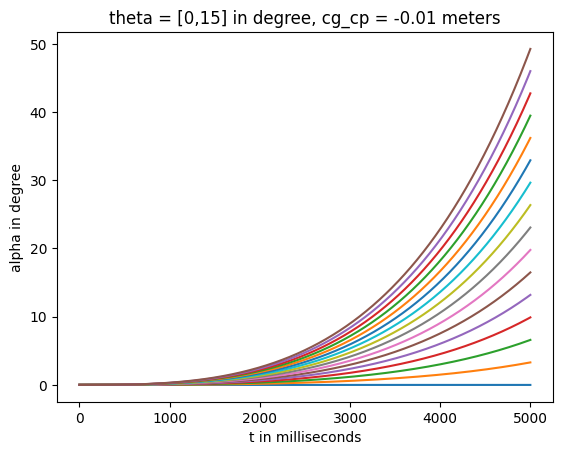

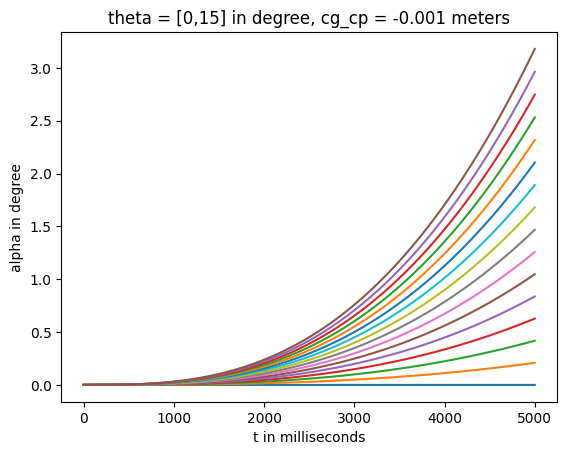

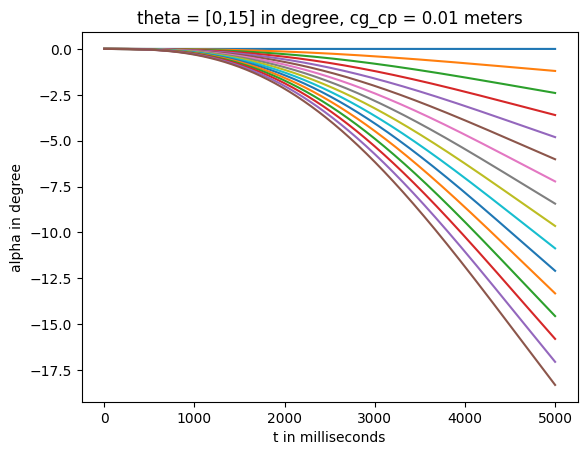

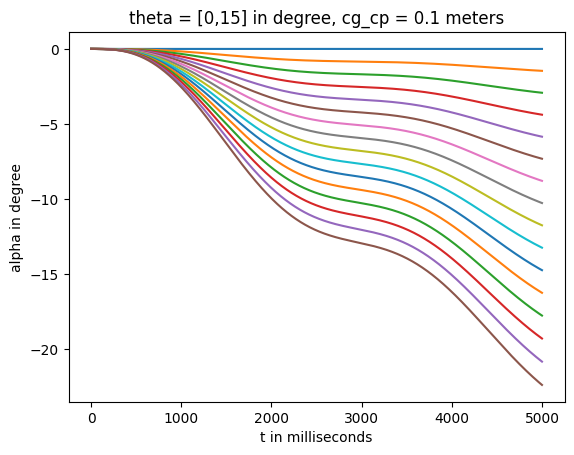

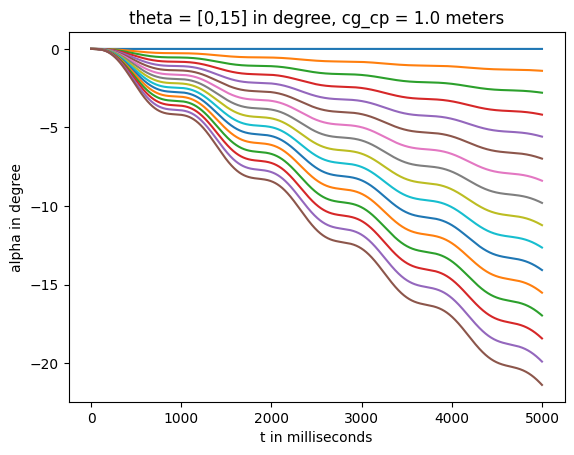

In [9]:
for j in range(0,len(cg_cp_Arr)):
    for i in range(0,len(thetaArr)):
        alph,bet,V = loopAll(cg_cp_Arr[j],thetaArr[i])
        plt.plot(np.rad2deg(alph))
    legend = legendArr(thetaArr,[cg_cp_Arr[j]])
    # plt.legend(legend,loc = 'center right', bbox_to_anchor=(1.4,0.5))
    plt.title("theta = [0,15] in degree, cg_cp = "+str(cg_cp_Arr[j])+" meters")
    plt.xlabel("t in milliseconds")
    plt.ylabel("alpha in degree")
    plt.show()

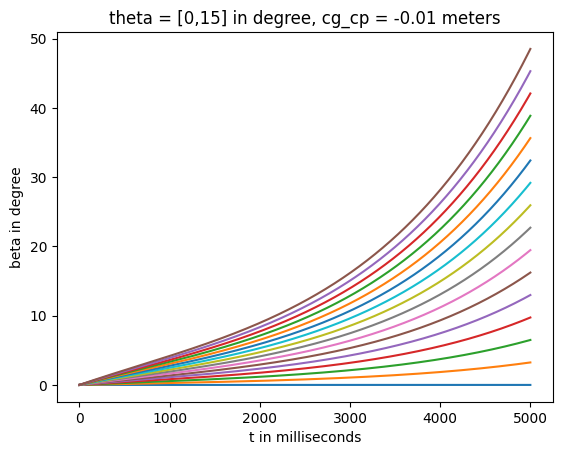

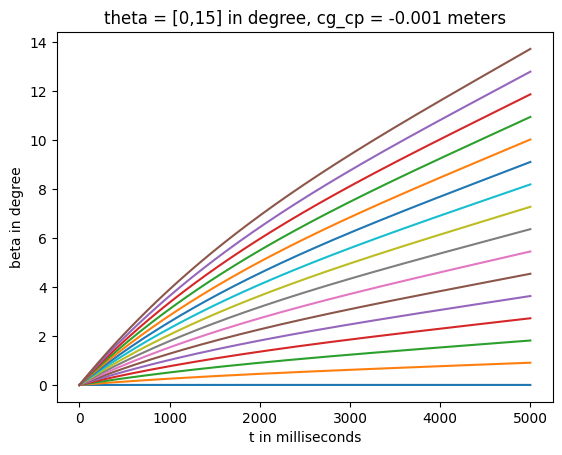

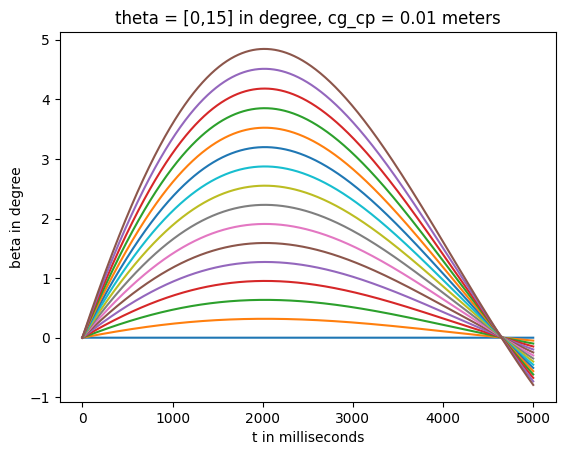

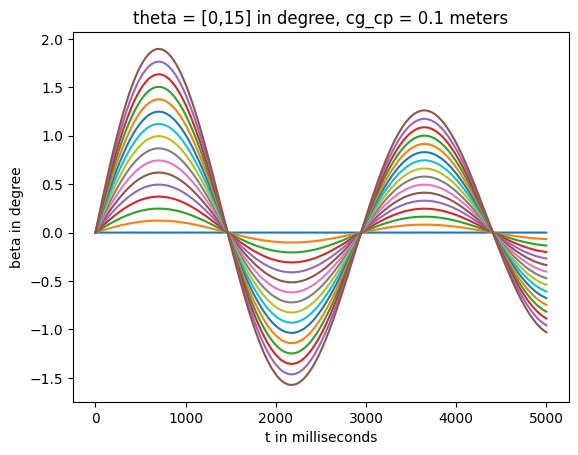

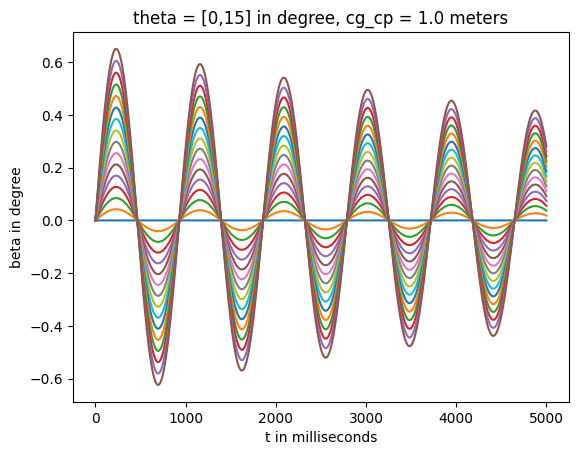

In [10]:
for j in range(0,len(cg_cp_Arr)):
    for i in range(0,len(thetaArr)):
        alph,bet,V = loopAll(cg_cp_Arr[j],thetaArr[i])
        plt.plot(np.rad2deg(bet))
    legend = legendArr(thetaArr,[cg_cp_Arr[j]])
    # plt.legend(legend,loc = 'center right', bbox_to_anchor=(1.4,0.5))
    plt.title("theta = [0,15] in degree, cg_cp = "+str(cg_cp_Arr[j])+" meters")
    plt.xlabel("t in milliseconds")
    plt.ylabel("beta in degree")
    plt.show()